# Mustafa Alhelawe
# Programming Exercise \#4
---

# Preamble

In [1]:
# optional code cell when using Google Colab with Google Drive

# remove the docstring comment block below in order to mount Google Drive
'''
# mount Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

# change directory using the magic command %cd
### replace [MY PATH] below with your own path in Google Drive ###
### %cd /content/drive/My\ Drive/[MY PATH] ###
'''

"\n# mount Google Drive in Google Colab\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\n# change directory using the magic command %cd\n### replace [MY PATH] below with your own path in Google Drive ###\n### %cd /content/drive/My\\ Drive/[MY PATH] ###\n"

In [2]:
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex
import seaborn as sns

# **1. Machine Learning for Diagnosis of 'Senioritis'**

## Problem 1.1

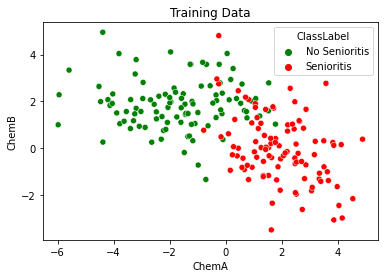

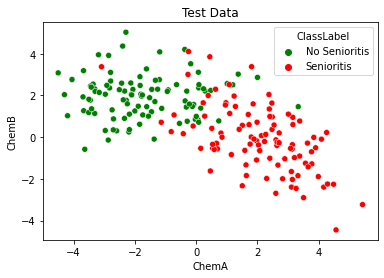

In [3]:
train = pd.read_csv('SenioritisTrainingData.csv')
test = pd.read_csv('SenioritisTestData.csv')
colors = {'No Senioritis':'green', 'Senioritis':'red'}
plt.figure()
sns.scatterplot(data=train, x='ChemA', y='ChemB', hue=train['ClassLabel'], palette=colors).set(title='Training Data')
plt.figure()
sns.scatterplot(data=test, x='ChemA', y='ChemB', hue=train['ClassLabel'], palette=colors).set(title='Test Data')

train['ClassLabelEnc'] = pd.Categorical(train['ClassLabel']).codes
test['ClassLabelEnc'] = pd.Categorical(test['ClassLabel']).codes

## Problem 1.2

### (a)

In [4]:
X_train = train.iloc[:, [1,2]]
y_train = train.loc[:, ['ClassLabelEnc']]


cov = X_train.cov()
invcov = np.linalg.inv(cov)

class0 = train[train['ClassLabel'] == 'No Senioritis']
class1 = train[train['ClassLabel'] == 'Senioritis']

mean0 = [np.mean(class0['ChemA']), np.mean(class0['ChemB'])]
mean1 = [np.mean(class1['ChemA']), np.mean(class1['ChemB'])]


vector0=np.dot(invcov,mean0)
vector1=np.dot(invcov,mean1)

pi0 = 0.5
pi1 = 0.5

intercept0 = -(np.dot(mean0, vector0)/2) + np.log(pi0)
intercept1 = -(np.dot(mean1, vector1)/2) + np.log(pi1)

score0 = []
score1 = []

for index, row in test.iterrows():
    x = [row['ChemA'], row['ChemB']]
    s0 = np.dot(vector0,x)+intercept0
    score0.append(s0)
    s1 = np.dot(vector1,x)+intercept1
    score1.append(s1)
    
test_LDAresult = test.copy()
test_LDAresult['Score0'] = score0
test_LDAresult['Score1'] = score1

LDA = []

for index, row in test_LDAresult.iterrows():
    if row['Score0'] > row['Score1']:
        LDA.append(0)
    else:
        LDA.append(1)
        
test_LDAresult['Prediction'] = LDA

test_LDAresult

,ClassLabel,ChemA,ChemB,ClassLabelEnc,Score0,Score1,Prediction
0,No Senioritis,-2.741254,1.306506,0,-0.350545,-2.016675,0
1,No Senioritis,0.740437,0.777617,0,-0.864220,-0.480691,1
2,No Senioritis,-2.194054,0.248409,0,-1.131720,-2.179876,0
3,No Senioritis,0.297858,2.210354,0,0.182086,-0.109269,0
4,No Senioritis,-3.669042,1.265693,0,-0.344236,-2.501402,0
...,...,...,...,...,...,...,...
195,Senioritis,3.085204,-0.536537,1,-1.898385,0.156181,1
196,Senioritis,0.540694,-0.342577,1,-1.661322,-1.046269,1
197,Senioritis,0.232377,1.645138,1,-0.221463,-0.376843,0
198,Senioritis,1.862517,1.593764,1,-0.320974,0.423754,1


### (b)

In [5]:
#X_train = train.iloc[:, [1,2]]

#class0 = train[train['ClassLabel'] == 'No Senioritis']
#class1 = train[train['ClassLabel'] == 'Senioritis']

class0_X = class0.iloc[:, [1,2]]
class1_X = class1.iloc[:, [1,2]]

#mean0 = [np.mean(class0['ChemA']), np.mean(class0['ChemB'])]
#mean1 = [np.mean(class1['ChemA']), np.mean(class1['ChemB'])]

cov0 = class0_X.cov()
cov1 = class1_X.cov()
invcov0 = np.linalg.inv(cov0)
invcov1 = np.linalg.inv(cov1)

#pi0 = 0.5
#pi1 = 0.5

intercept0_QDA = ((-np.log(np.linalg.det(cov0)))/2) + np.log(pi0)
intercept1_QDA = ((-np.log(np.linalg.det(cov1)))/2) + np.log(pi1)

score0_QDA = []
score1_QDA = []

for index, row in test.iterrows():
    x = [row['ChemA'], row['ChemB']]
    s0 = ((-np.dot(np.subtract(x,mean0),np.dot(invcov0, np.subtract(x,mean0))))/2)+intercept0_QDA
    score0_QDA.append(s0)
    s1 = ((-np.dot(np.subtract(x,mean1),np.dot(invcov1, np.subtract(x,mean1))))/2)+intercept1_QDA
    score1_QDA.append(s1)
test_QDAresult = test.copy()
test_QDAresult['Score0'] = score0_QDA
test_QDAresult['Score1'] = score1_QDA

QDA = []

for index, row in test_QDAresult.iterrows():
    if row['Score0'] > row['Score1']:
        QDA.append(0)
    else:
        QDA.append(1)

test_QDAresult['Prediction'] = QDA

test_QDAresult

,ClassLabel,ChemA,ChemB,ClassLabelEnc,Score0,Score1,Prediction
0,No Senioritis,-2.741254,1.306506,0,-1.601366,-8.680232,0
1,No Senioritis,0.740437,0.777617,0,-2.825060,-1.676207,1
2,No Senioritis,-2.194054,0.248409,0,-2.497943,-7.635563,0
3,No Senioritis,0.297858,2.210354,0,-2.042274,-2.710277,0
4,No Senioritis,-3.669042,1.265693,0,-2.096688,-12.145049,0
...,...,...,...,...,...,...,...
195,Senioritis,3.085204,-0.536537,1,-7.723030,-1.607613,1
196,Senioritis,0.540694,-0.342577,1,-4.303490,-2.093018,1
197,Senioritis,0.232377,1.645138,1,-1.953319,-2.378124,0
198,Senioritis,1.862517,1.593764,1,-3.503361,-1.899758,1


### (c)

In [6]:
#X_train = train.iloc[:, [1,2]]

#class0 = train[train['ClassLabel'] == 'No Senioritis']
#class1 = train[train['ClassLabel'] == 'Senioritis']

#mean0 = [np.mean(class0['ChemA']), np.mean(class0['ChemB'])]
#mean1 = [np.mean(class1['ChemA']), np.mean(class1['ChemB'])]

mean = X_train.mean()



dist0 = sps.multivariate_normal(mean0, cov0)
dist1 = sps.multivariate_normal(mean1, cov1)

prob0 = []
prob1 = []

for index, row in test.iterrows():
    x = [row['ChemA'], row['ChemB']]
    p0 = dist0.pdf(x)
    prob0.append(p0)
    p1 = dist1.pdf(x)
    prob1.append(p1)
    
test_GNBresult = test.copy()
test_GNBresult['Prob0'] = prob0
test_GNBresult['Prob1'] = prob1

GNB = []

for index, row in test_GNBresult.iterrows():
    if row['Prob0'] > row['Prob1']:
        GNB.append(0)
    else:
        GNB.append(1)

test_GNBresult['Prediction'] = GNB

test_GNBresult

,ClassLabel,ChemA,ChemB,ClassLabelEnc,Prob0,Prob1,Prediction
0,No Senioritis,-2.741254,1.306506,0,0.064178,0.000054,0
1,No Senioritis,0.740437,0.777617,0,0.018877,0.059550,1
2,No Senioritis,-2.194054,0.248409,0,0.026182,0.000154,0
3,No Senioritis,0.297858,2.210354,0,0.041295,0.021173,0
4,No Senioritis,-3.669042,1.265693,0,0.039108,0.000002,0
...,...,...,...,...,...,...,...
195,Senioritis,3.085204,-0.536537,1,0.000141,0.063778,1
196,Senioritis,0.540694,-0.342577,1,0.004304,0.039252,1
197,Senioritis,0.232377,1.645138,1,0.045137,0.029515,0
198,Senioritis,1.862517,1.593764,1,0.009580,0.047621,1


### (d)

In [7]:
def k_neighbors(train, x, k):
    distances = []
    for index,row in train.iterrows():
        dist = np.linalg.norm(np.subtract([x[0], x[1]],[row['ChemA'], row['ChemB']]))
        distances.append((row, dist))
    distances.sort(key=lambda c: c[1])
    neighbors = []
    for i in range(k):
        neighbors.append(distances[i][0])
    return neighbors

def predict_k(train, x, k):
    neighbors = k_neighbors(train, x, k)
    output = [row[-1] for row in neighbors]
    prediction = max(set(output), key=output.count)
    return prediction

k = []


for index, row in test.iterrows():
    x = np.array([row['ChemA'], row['ChemB'], row['ClassLabelEnc']])
    y = predict_k(train.iloc[:,[1,2,3]], x, 3)
    k.append(y)
    
test_KNNresult = test.copy()
test_KNNresult['Prediction'] = k
test_KNNresult

,ClassLabel,ChemA,ChemB,ClassLabelEnc,Prediction
0,No Senioritis,-2.741254,1.306506,0,0.0
1,No Senioritis,0.740437,0.777617,0,1.0
2,No Senioritis,-2.194054,0.248409,0,0.0
3,No Senioritis,0.297858,2.210354,0,0.0
4,No Senioritis,-3.669042,1.265693,0,0.0
...,...,...,...,...,...
195,Senioritis,3.085204,-0.536537,1,1.0
196,Senioritis,0.540694,-0.342577,1,1.0
197,Senioritis,0.232377,1.645138,1,0.0
198,Senioritis,1.862517,1.593764,1,1.0


## Problem 1.3

### (a)

In [8]:
#LDA
LDAcount = 0
for index, row in test_LDAresult.iterrows():
    if row['Prediction'] != row['ClassLabelEnc']:
        LDAcount+=1
LDApmc = LDAcount/200
#QDA
QDAcount = 0
for index, row in test_QDAresult.iterrows():
    if row['Prediction'] != row['ClassLabelEnc']:
        QDAcount+=1
QDApmc = QDAcount/200
#GNB
GNBcount = 0
for index, row in test_GNBresult.iterrows():
    if row['Prediction'] != row['ClassLabelEnc']:
        GNBcount+=1
GNBpmc = GNBcount/200
#KNN

KNNcount = 0
for index, row in test_KNNresult.iterrows():
    if row['Prediction'] != row['ClassLabelEnc']:
        KNNcount+=1
KNNpmc = KNNcount/200

print("Probability of Misclassification for LDA:", LDApmc, "QDA: ", QDApmc, "GNB: ", GNBpmc, "KNN: ", KNNpmc)

Probability of Misclassification for LDA: 0.085 QDA:  0.09 GNB:  0.09 KNN:  0.095


### (b)

In [9]:
LDAclass0 = test_LDAresult[test_LDAresult['ClassLabel'] == 'No Senioritis']
LDAclass1 = test_LDAresult[test_LDAresult['ClassLabel'] == 'Senioritis']

LDATPcount=0
for index, row in LDAclass1.iterrows():
    if row['Prediction'] == row['ClassLabelEnc']:
        LDATPcount+=1
LDATPR = LDATPcount/100

print("Number of True Positives LDA: ", LDATPcount, "True Positive Rate: ", LDATPR)

QDAclass0 = test_QDAresult[test_QDAresult['ClassLabel'] == 'No Senioritis']
QDAclass1 = test_QDAresult[test_QDAresult['ClassLabel'] == 'Senioritis']

QDATPcount=0
for index, row in QDAclass1.iterrows():
    if row['Prediction'] == row['ClassLabelEnc']:
        QDATPcount+=1
QDATPR = QDATPcount/100

print("Number of True Positives QDA: ", QDATPcount, "True Positive Rate: ", QDATPR)

GNBclass0 = test_GNBresult[test_GNBresult['ClassLabel'] == 'No Senioritis']
GNBclass1 = test_GNBresult[test_GNBresult['ClassLabel'] == 'Senioritis']

GNBTPcount=0
for index, row in GNBclass1.iterrows():
    if row['Prediction'] == row['ClassLabelEnc']:
        GNBTPcount+=1
GNBTPR = GNBTPcount/100

print("Number of True Positives GNB: ", GNBTPcount, "True Positive Rate: ", GNBTPR)

KNNclass0 = test_KNNresult[test_KNNresult['ClassLabel'] == 'No Senioritis']
KNNclass1 = test_KNNresult[test_KNNresult['ClassLabel'] == 'Senioritis']

KNNTPcount=0
for index, row in KNNclass1.iterrows():
    if row['Prediction'] == row['ClassLabelEnc']:
        KNNTPcount+=1
KNNTPR = KNNTPcount/100

print("Number of True Positives KNN: ", KNNTPcount, "True Positive Rate: ", KNNTPR)


Number of True Positives LDA:  89 True Positive Rate:  0.89
Number of True Positives QDA:  88 True Positive Rate:  0.88
Number of True Positives GNB:  88 True Positive Rate:  0.88
Number of True Positives KNN:  91 True Positive Rate:  0.91


### (c)

In [10]:
LDAFPcount=0
for index, row in LDAclass0.iterrows():
    if row['Prediction'] != row['ClassLabelEnc']:
        LDAFPcount+=1
LDAFPR = LDAFPcount/100

print("Number of False Positives LDA: ", LDAFPcount, "False Positive Rate: ", LDAFPR)

QDAFPcount=0
for index, row in QDAclass0.iterrows():
    if row['Prediction'] != row['ClassLabelEnc']:
        QDAFPcount+=1
QDAFPR = QDAFPcount/100

print("Number of False Positives QDA: ", QDAFPcount, "False Positive Rate: ", QDAFPR)

GNBFPcount=0
for index, row in GNBclass0.iterrows():
    if row['Prediction'] != row['ClassLabelEnc']:
        GNBFPcount+=1
GNBFPR = GNBFPcount/100

print("Number of False Positives GNB: ", GNBFPcount, "False Positive Rate: ", GNBFPR)

KNNFPcount=0
for index, row in KNNclass0.iterrows():
    if row['Prediction'] != row['ClassLabelEnc']:
        KNNFPcount+=1
KNNFPR = KNNFPcount/100

print("Number of False Positives KNN: ", KNNFPcount, "False Positive Rate: ", KNNFPR)


Number of False Positives LDA:  6 False Positive Rate:  0.06
Number of False Positives QDA:  6 False Positive Rate:  0.06
Number of False Positives GNB:  6 False Positive Rate:  0.06
Number of False Positives KNN:  10 False Positive Rate:  0.1


### (d)

In [11]:
LDATNcount=0
for index, row in LDAclass0.iterrows():
    if row['Prediction'] == row['ClassLabelEnc']:
        LDATNcount+=1
LDATNR = LDATNcount/100

print("Number of True Negatives LDA: ", LDATNcount, "True Negative Rate: ", LDATNR)

QDATNcount=0
for index, row in QDAclass0.iterrows():
    if row['Prediction'] == row['ClassLabelEnc']:
        QDATNcount+=1
QDATNR = QDATNcount/100

print("Number of True Negatives QDA: ", QDATNcount, "True Negative Rate: ", QDATNR)

GNBTNcount=0
for index, row in GNBclass0.iterrows():
    if row['Prediction'] == row['ClassLabelEnc']:
        GNBTNcount+=1
GNBTNR = GNBTNcount/100

print("Number of True Negatives GNB: ", GNBTNcount, "True Negative Rate: ", GNBTNR)

KNNTNcount=0
for index, row in KNNclass0.iterrows():
    if row['Prediction'] == row['ClassLabelEnc']:
        KNNTNcount+=1
KNNTNR = KNNTNcount/100

print("Number of True Negatives KNN: ", KNNTNcount, "True Negative Rate: ", KNNTNR)


Number of True Negatives LDA:  94 True Negative Rate:  0.94
Number of True Negatives QDA:  94 True Negative Rate:  0.94
Number of True Negatives GNB:  94 True Negative Rate:  0.94
Number of True Negatives KNN:  90 True Negative Rate:  0.9


### (e)

In [12]:
LDAFNcount=0
for index, row in LDAclass1.iterrows():
    if row['Prediction'] != row['ClassLabelEnc']:
        LDAFNcount+=1
LDAFNR = LDAFNcount/100

print("Number of False Negatives LDA: ", LDAFNcount, "False Negative Rate: ", LDAFNR)

QDAFNcount=0
for index, row in QDAclass1.iterrows():
    if row['Prediction'] != row['ClassLabelEnc']:
        QDAFNcount+=1
QDAFNR = QDAFNcount/100

print("Number of False Negatives QDA: ", QDAFNcount, "False Negative Rate: ", QDAFNR)

GNBFNcount=0
for index, row in GNBclass1.iterrows():
    if row['Prediction'] != row['ClassLabelEnc']:
        GNBFNcount+=1
GNBFNR = GNBFNcount/100

print("Number of False Negatives GNB: ", GNBFNcount, "False Negative Rate: ", GNBFNR)

KNNFNcount=0
for index, row in KNNclass1.iterrows():
    if row['Prediction'] != row['ClassLabelEnc']:
        KNNFNcount+=1
KNNFNR = KNNFNcount/100

print("Number of False Negatives KNN: ", KNNFNcount, "False Negative Rate: ", KNNFNR)


Number of False Negatives LDA:  11 False Negative Rate:  0.11
Number of False Negatives QDA:  12 False Negative Rate:  0.12
Number of False Negatives GNB:  12 False Negative Rate:  0.12
Number of False Negatives KNN:  9 False Negative Rate:  0.09


## Problem 1.4

The best classifier to use in this case is LDA as it has the lowest probability of misclassification

## Problem 1.5

### (a)

[Text(0.5, 1.0, 'Training Data with LDA Decision Boundary')]

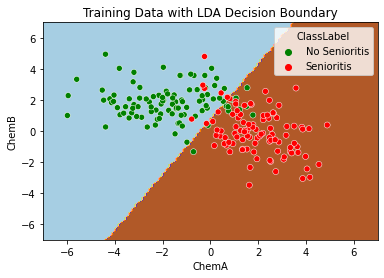

In [13]:
X = X_train.values

#minA, maxA = X[:, 0].min()-1, X[:, 0].max()+1
#minB, maxB = X[:, 1].min()-1, X[:, 1].max()+1

#xAgrid = np.arange(minA, maxA, 0.1)
#xBgrid = np.arange(minB, maxB, 0.1)

xAgrid = np.linspace(-7, 7, 100)
xBgrid = np.linspace(-7, 7, 100)

xx, yy = np.meshgrid(xAgrid, xBgrid)

rA, rB = xx.flatten(), yy.flatten()
rA, rB = rA.reshape((len(rA), 1)), rB.reshape((len(rB), 1))

grid = np.hstack((rA,rB))

LDA_grid = pd.DataFrame(grid, columns=['ChemA','ChemB'])

score0_LDAmesh = []
score1_LDAmesh = []

for index, row in LDA_grid.iterrows():
    x = [row['ChemA'], row['ChemB']]
    s0 = np.dot(vector0,x)+intercept0
    score0_LDAmesh.append(s0)
    s1 = np.dot(vector1,x)+intercept1
    score1_LDAmesh.append(s1)

LDA_grid['Score0'] = score0_LDAmesh
LDA_grid['Score1'] = score1_LDAmesh

LDAmesh = []

for index, row in LDA_grid.iterrows():
    if row['Score0'] > row['Score1']:
        LDAmesh.append(0)
    else:
        LDAmesh.append(1)

LDA_grid['Prediction'] = LDAmesh

meshResultLDA = LDA_grid.iloc[:,4].values

zz = meshResultLDA.reshape(xx.shape)

plt.contourf(xx, yy, zz, cmap='Paired')
sns.scatterplot(data=train, x='ChemA', y='ChemB', hue=train['ClassLabel'], palette=colors).set(title='Training Data with LDA Decision Boundary')


### (b)

[Text(0.5, 1.0, 'Training Data with QDA Decision Boundary')]

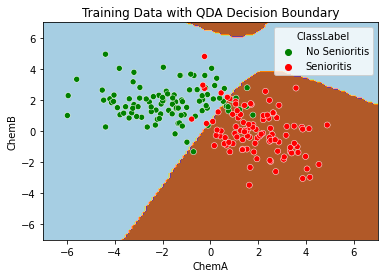

In [14]:
QDA_grid = pd.DataFrame(grid, columns=['ChemA','ChemB'])

score0_QDAmesh = []
score1_QDAmesh = []

for index, row in QDA_grid.iterrows():
    x = [row['ChemA'], row['ChemB']]
    s0 = ((-np.dot(np.subtract(x,mean0),np.dot(invcov0, np.subtract(x,mean0))))/2)+intercept0_QDA
    score0_QDAmesh.append(s0)
    s1 = ((-np.dot(np.subtract(x,mean1),np.dot(invcov1, np.subtract(x,mean1))))/2)+intercept1_QDA
    score1_QDAmesh.append(s1)

QDA_grid['Score0'] = score0_QDAmesh
QDA_grid['Score1'] = score1_QDAmesh

QDAmesh = []

for index, row in QDA_grid.iterrows():
    if row['Score0'] > row['Score1']:
        QDAmesh.append(0)
    else:
        QDAmesh.append(1)

QDA_grid['Prediction'] = QDAmesh

meshResult = QDA_grid.iloc[:,4].values

zz = meshResult.reshape(xx.shape)

plt.contourf(xx, yy, zz, cmap='Paired')
sns.scatterplot(data=train, x='ChemA', y='ChemB', hue=train['ClassLabel'], palette=colors).set(title='Training Data with QDA Decision Boundary')


### (c)

[Text(0.5, 1.0, 'Training Data with GNB Decision Boundary')]

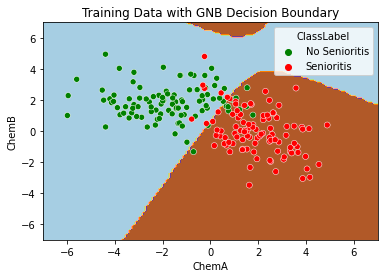

In [15]:
GNB_grid = pd.DataFrame(grid, columns=['ChemA','ChemB'])

prob0_GNBmesh = []
prob1_GNBmesh = []

for index, row in GNB_grid.iterrows():
    x = [row['ChemA'], row['ChemB']]
    p0 = dist0.pdf(x)
    prob0_GNBmesh.append(p0)
    p1 = dist1.pdf(x)
    prob1_GNBmesh.append(p1)

GNB_grid['Prob0'] = prob0_GNBmesh
GNB_grid['Prob1'] = prob1_GNBmesh

GNBmesh = []

for index, row in GNB_grid.iterrows():
    if row['Prob0'] > row['Prob1']:
        GNBmesh.append(0)
    else:
        GNBmesh.append(1)

GNB_grid['Prediction'] = GNBmesh

meshResultGNB = GNB_grid.iloc[:,4].values

zz = meshResultGNB.reshape(xx.shape)


plt.contourf(xx, yy, zz, cmap='Paired')
sns.scatterplot(data=train, x='ChemA', y='ChemB', hue=train['ClassLabel'], palette=colors).set(title='Training Data with GNB Decision Boundary')


### (d)

In [16]:
KNN_grid = pd.DataFrame(grid, columns=['ChemA','ChemB'])
KNN_grid['ClassLabelEnc'] = 0

kmesh = []
for index, row in KNN_grid.iterrows():
    x = [row['ChemA'], row['ChemB'], row['ClassLabelEnc']]
    y = predict_k(train.iloc[:,[1,2,3]], x, 3)
    kmesh.append(y)

KNN_grid['Prediction'] = kmesh

meshResultKNN = KNN_grid.iloc[:,3].values

zz = meshResultKNN.reshape(xx.shape)

[Text(0.5, 1.0, 'Training Data with KNN Decision Boundary')]

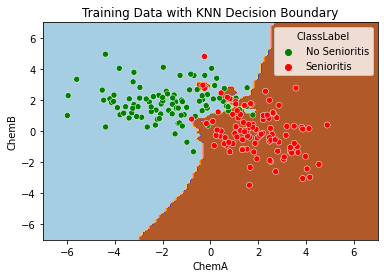

In [17]:
plt.contourf(xx, yy, zz, cmap='Paired')
sns.scatterplot(data=train, x='ChemA', y='ChemB', hue=train['ClassLabel'], palette=colors).set(title='Training Data with KNN Decision Boundary')


### (e)

[Text(0.5, 1.0, 'Training Data with IB Decision Boundary')]

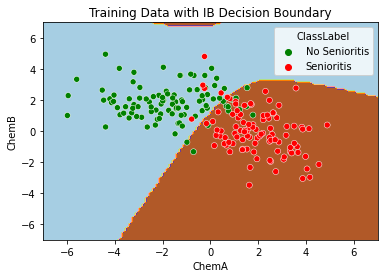

In [18]:
IB_grid = pd.DataFrame(grid, columns=['ChemA','ChemB'])

mean0_IB = np.array([-2,2])
mean1_IB = np.array([2,0])
cov0_IB = np.array([[3,0], [0,1]])
cov1_IB = np.array([[2,-1], [-1,2]])

dist0IB = sps.multivariate_normal(mean0_IB, cov0_IB)
dist1IB = sps.multivariate_normal(mean1_IB, cov1_IB)

prob0IB = []
prob1IB = []

for index, row in IB_grid.iterrows():
    x = [row['ChemA'], row['ChemB']]
    p0 = dist0IB.pdf(x)
    prob0IB.append(p0)
    p1 = dist1IB.pdf(x)
    prob1IB.append(p1)
    
IB_grid['Prob0'] = prob0IB
IB_grid['Prob1'] = prob1IB

IB = []

for index, row in IB_grid.iterrows():
    if row['Prob0'] > row['Prob1']:
        IB.append(0)
    else:
        IB.append(1)

IB_grid['Prediction'] = IB

meshResultIB = IB_grid.iloc[:,4].values

zz = meshResultIB.reshape(xx.shape)

plt.contourf(xx, yy, zz, cmap='Paired')
sns.scatterplot(data=train, x='ChemA', y='ChemB', hue=train['ClassLabel'], palette=colors).set(title='Training Data with IB Decision Boundary')


## Problem 1.6


### (a)

In [19]:
def KNN_error(train, test, k):
    count = 0
    for index, row in test.iterrows():
        x = [row['ChemA'], row['ChemB'], row['ClassLabelEnc']]
        y = predict_k(train.iloc[:,[1,2,3]], x, k)
        if y != row['ClassLabelEnc']:
            count+=1
    return count/200

trainError = []
testError = []

for k in range(10):
    trainError.append(KNN_error(train, train, k+1))
    testError.append(KNN_error(train, test, k+1))    

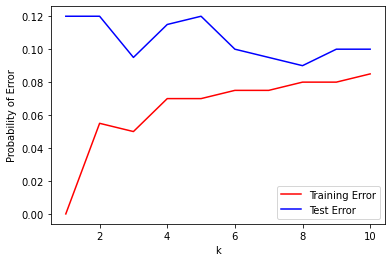

In [20]:
x = np.linspace(1,10,10)

plt.figure()
plt.xlabel('k')
plt.ylabel('Probability of Error')
plt.plot(x , trainError, c = 'r', label='Training Error')
plt.plot(x, testError, c = 'b', label='Test Error')
plt.legend(loc="lower right")



### (b)

The best value for k in KNN is 8, as his has the lowest Test Error as shown above. 